<br><p style="font-size:250%;text-align:center;color:#002233">House Prices: Advanced Regression Techniques </p><br>

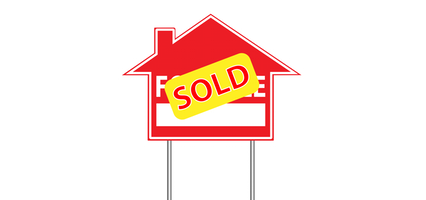

<p style="font-size:200%;color:#00334d"> <b>I)   EDA: Exploration et analyse des données </b> </p>

# Description des données

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#bring in the six packs
df_train = pd.read_csv('train.csv')

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Description des données tirés de Kaggle : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

        SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
        MSSubClass: The building class
        MSZoning: The general zoning classification
        LotFrontage: Linear feet of street connected to property
        LotArea: Lot size in square feet
        Street: Type of road access
        Alley: Type of alley access
        LotShape: General shape of property
        LandContour: Flatness of the property
        Utilities: Type of utilities available
        LotConfig: Lot configuration
        LandSlope: Slope of property
        Neighborhood: Physical locations within Ames city limits
        Condition1: Proximity to main road or railroad
        Condition2: Proximity to main road or railroad (if a second is present)
        BldgType: Type of dwelling
        HouseStyle: Style of dwelling
        OverallQual: Overall material and finish quality
        OverallCond: Overall condition rating
        YearBuilt: Original construction date
        YearRemodAdd: Remodel date
        RoofStyle: Type of roof
        RoofMatl: Roof material
        Exterior1st: Exterior covering on house
        Exterior2nd: Exterior covering on house (if more than one material)
        MasVnrType: Masonry veneer type
        MasVnrArea: Masonry veneer area in square feet
        ExterQual: Exterior material quality
        ExterCond: Present condition of the material on the exterior
        Foundation: Type of foundation
        BsmtQual: Height of the basement
        BsmtCond: General condition of the basement
        BsmtExposure: Walkout or garden level basement walls
        BsmtFinType1: Quality of basement finished area
        BsmtFinSF1: Type 1 finished square feet
        BsmtFinType2: Quality of second finished area (if present)
        BsmtFinSF2: Type 2 finished square feet
        BsmtUnfSF: Unfinished square feet of basement area
        TotalBsmtSF: Total square feet of basement area
        Heating: Type of heating
        HeatingQC: Heating quality and condition
        CentralAir: Central air conditioning
        Electrical: Electrical system
        1stFlrSF: First Floor square feet
        2ndFlrSF: Second floor square feet
        LowQualFinSF: Low quality finished square feet (all floors)
        GrLivArea: Above grade (ground) living area square feet
        BsmtFullBath: Basement full bathrooms
        BsmtHalfBath: Basement half bathrooms
        FullBath: Full bathrooms above grade
        HalfBath: Half baths above grade
        Bedroom: Number of bedrooms above basement level
        Kitchen: Number of kitchens
        KitchenQual: Kitchen quality
        TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
        Functional: Home functionality rating
        Fireplaces: Number of fireplaces
        FireplaceQu: Fireplace quality
        GarageType: Garage location
        GarageYrBlt: Year garage was built
        GarageFinish: Interior finish of the garage
        GarageCars: Size of garage in car capacity
        GarageArea: Size of garage in square feet
        GarageQual: Garage quality
        GarageCond: Garage condition
        PavedDrive: Paved driveway
        WoodDeckSF: Wood deck area in square feet
        OpenPorchSF: Open porch area in square feet
        EnclosedPorch: Enclosed porch area in square feet
        3SsnPorch: Three season porch area in square feet
        ScreenPorch: Screen porch area in square feet
        PoolArea: Pool area in square feet
        PoolQC: Pool quality
        Fence: Fence quality
        MiscFeature: Miscellaneous feature not covered in other categories
        MiscVal: $Value of miscellaneous feature
        MoSold: Month Sold
        YrSold: Year Sold
        SaleType: Type of sale
        SaleCondition: Condition of sale

En suivant le tutoriel : https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

1. In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:

    **Variable** - Variable name.  

    **Type** - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.  

    **Segment** - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').  

    **Expectation** - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.  

    **Conclusion** - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.  

    **Comments** - Any general comments that occured to us.

Voici les conclusions auxquels je suis arrivée:
<img src='exeAnalysis.PNG'>

D'après ma premiere analyse les carateristiques les plus importantes sont : Neighborhood - BldgType - OverallQual - YearBuilt -
GarageCars.  
Allons faire une analyse statistique et voir si j'ai raison :

## Analyse de SalePrice

In [5]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

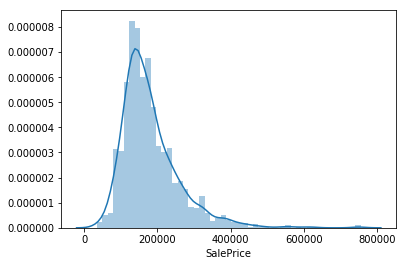

In [6]:
#histogram
sns.distplot(df_train['SalePrice']);

- Notre distribution devie de la moyenne (n'est pas une distribtion qui suit la loi normale)
- La distribution présente une asymétrie positive
- A un sommet

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- Notre coefficient Skewness > 0 => Comme eclairci precedemment la distribution possede une forte queue vers la droite (les + l'emportent)
- Kurtosis > 0 indique que les queues comptent plus d’observations que dans une distribution gaussienne.Et en plus il est grand ce qui veut dire on a beaucoup de valeurs eloignees de la moyenne.

**Reference**: http://www.parisschoolofeconomics.com/chassagnon-arnold/Stat4.pdf

# Analyse des données à l'état brute

### Analyse de SalePrice avec les variables numériques

In [8]:
quantitave_val = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 
                  'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 
                  'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 
                  'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'PoolArea', 'ScreenPorch', 
                  'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']

In [9]:
def checkCorrelation(df, targetval, listquantval):
    for elet in listquantval:
        correlation = df[targetval].corr(df[elet])
        if correlation > 0.50 :
            print('--------POSIIVE---------')
            print('Corr of {} vs {} is : {}\n'.format(targetval, elet, correlation))
        elif correlation < -0.50 :
            print('--------NEGATIVE---------')
            print('Corr of {} vs {} is : {}\n'.format(targetval, elet, correlation))

In [10]:
checkCorrelation(df_train, 'SalePrice', quantitave_val)

--------POSIIVE---------
Corr of SalePrice vs 1stFlrSF is : 0.6058521846919146

--------POSIIVE---------
Corr of SalePrice vs FullBath is : 0.5606637627484449

--------POSIIVE---------
Corr of SalePrice vs GarageArea is : 0.6234314389183617

--------POSIIVE---------
Corr of SalePrice vs GarageCars is : 0.6404091972583529

--------POSIIVE---------
Corr of SalePrice vs GrLivArea is : 0.7086244776126521

--------POSIIVE---------
Corr of SalePrice vs TotRmsAbvGrd is : 0.533723155582028

--------POSIIVE---------
Corr of SalePrice vs TotalBsmtSF is : 0.6135805515591954

--------POSIIVE---------
Corr of SalePrice vs YearBuilt is : 0.5228973328794968

--------POSIIVE---------
Corr of SalePrice vs YearRemodAdd is : 0.5071009671113863



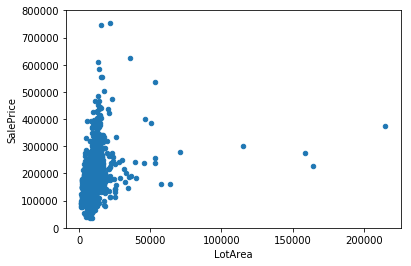

In [11]:
#scatter plot LotArea/saleprice
var = 'LotArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- LotArea a ignoré

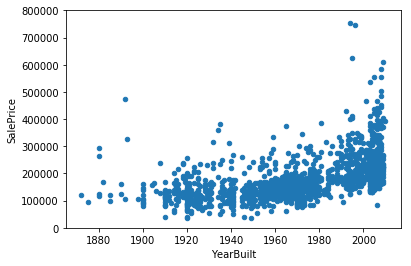

In [12]:
#scatter plot YearBuilt/saleprice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

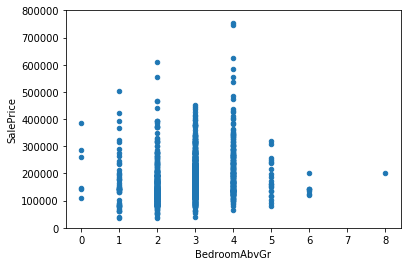

In [13]:
#scatter plot BedroomAbvGr/saleprice
var = 'BedroomAbvGr'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- Pour les correlations positives on dirait que les plus proches de 1 sont : `GrLivArea`(et ses amis), `TotalBsmtSF`(et ses amis), `1stFlrSF` et `YearBuilt`(et son ami YearRemodAdd) et il y a `FullBath` aussi par rapport aux autres correlations.
- Pour les correlation negatives : Rien a signaler.

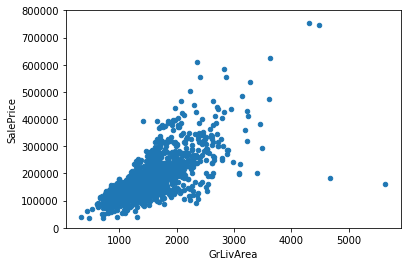

In [14]:
#scatter plot GrLivArea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

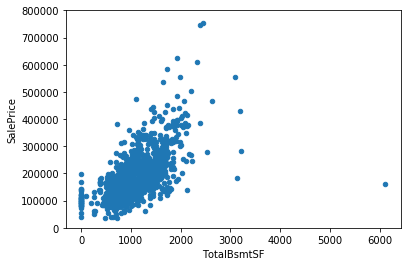

In [15]:
#scatter plot TotalBsmtSF/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

On verra les autres représentations dans une analyse générale.

### Analyse de SalePrice avec les variables catégoriques

In [16]:
qualitative_var = ['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 
                    'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 
                    'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
                    'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 
                    'MasVnrType', 'OverallCond', 'OverallQual','MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 
                   'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']

On va voir ceux que je pense avoir une très grande influence et après on passe à une meilleure analyse:

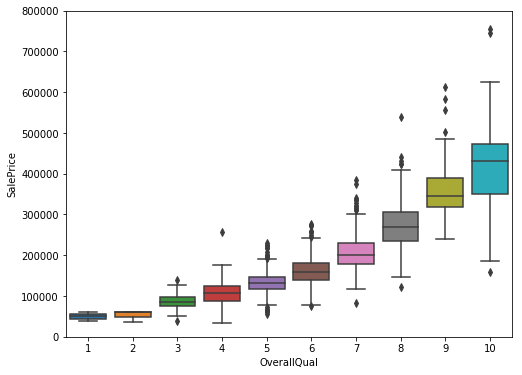

In [17]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

- Rien de surprenant une meilleure qualité un plus haut prix.

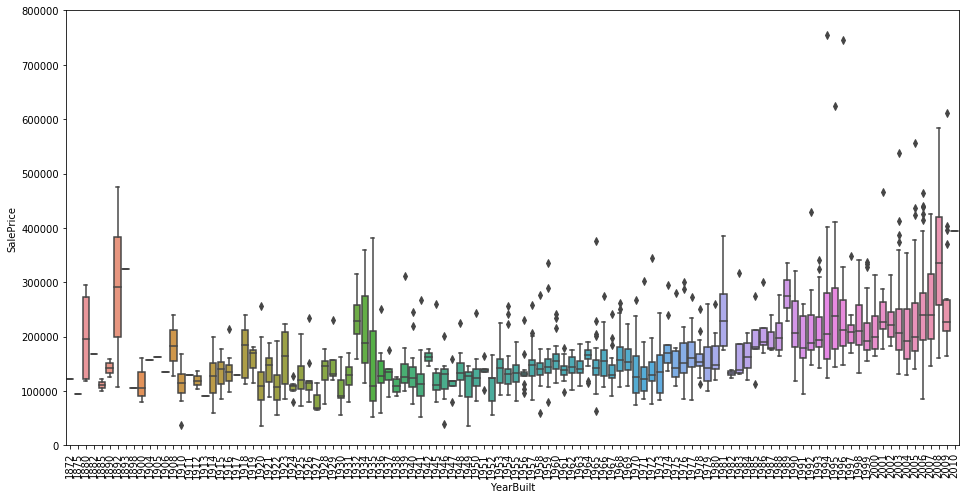

In [18]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

- On peut dire que : Plus recente la construction, plus eleve est le prix. Mais y a ceux qui aiment les antiquités donc...

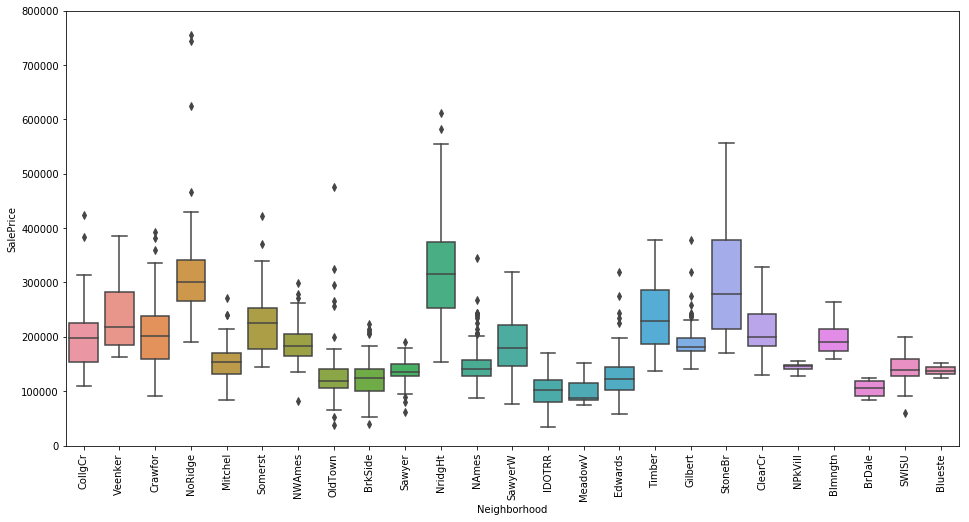

In [19]:
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

- On dirait que l'emplacement joue un role aussi dans l'importance du prix.

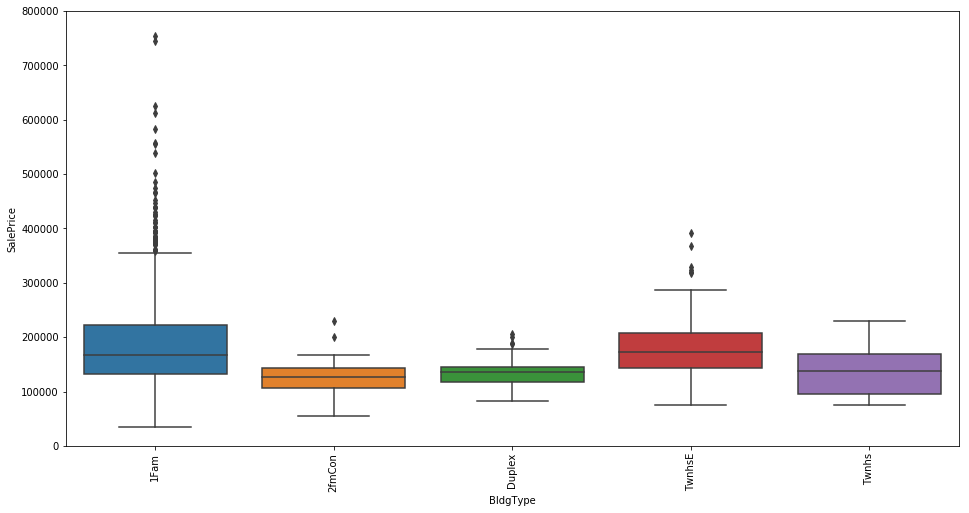

In [20]:
var = 'BldgType'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

- Interessant la variable building fait une difference aussi dans le prix.

**En résumé**  

Nous pouvons conclure que:

- 'GrLivArea' et 'TotalBsmtSF' semblent être liés linéairement à 'SalePrice'. Les deux relations sont positives, ce qui signifie que lorsqu'une variable augmente, l'autre augmente également. Dans le cas de 'TotalBsmtSF', nous pouvons voir que la pente de la relation linéaire est particulièrement élevée.
- "OverallQual" et "YearBuilt" semblent également être associés à "SalePrice". La relation semble être plus forte dans le cas de 'OverallQual', où le graphique en boîtes montre comment les prix de vente augmentent avec la qualité globale.

## Analyse Générale

On va voir :  

* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

### Correlation matrix (heatmap style)

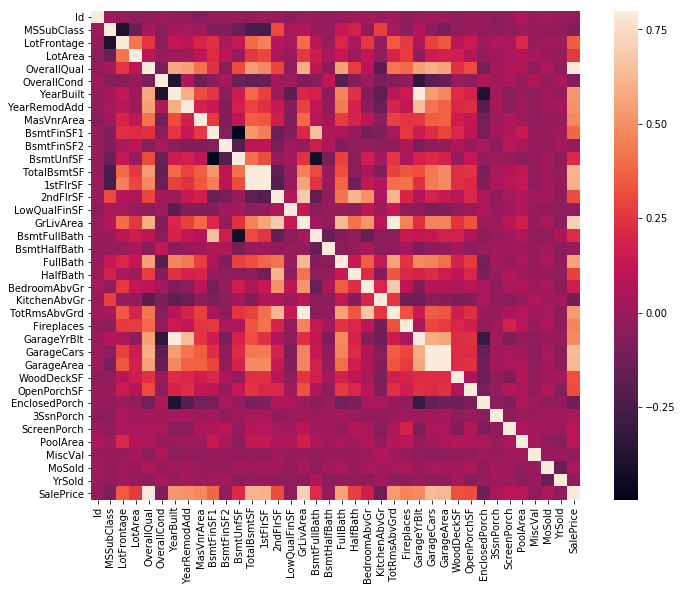

In [21]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

- De cette matrice on peut voir que les caracteristiques comme 'GarageX' sont tres dependant entre eux donc on pourrait choisir celle (ou l'une) la plus correlée avec la variable qu'on doit prédire. 
- On peut aussi remarqué que 'YearBuilt' et très corrélé avec 'GarageYrBlt'.  

Concentrons maitenant nous sur SalePrice.

### 'SalePrice' correlation matrix (zoomed heatmap style)

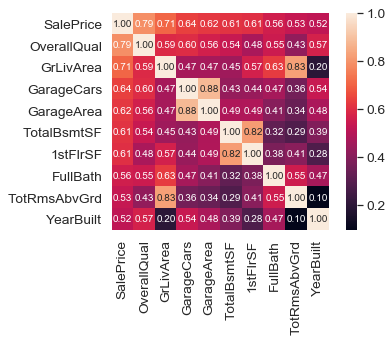

In [22]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- 'OverallQual', 'GrLivArea' et 'TotalBsmtSF' sont fortement corrélés à 'SalePrice'.
- 'GarageCars' et 'GarageArea' font également partie des variables les plus fortement corrélées. Cependant, comme nous l'avons vu dans le dernier sous-point, le nombre de voitures pouvant entrer dans le garage est une conséquence de la zone de garage. Par conséquent, nous n’avons besoin que d’une de ces variables dans notre analyse (nous pouvons conserver «GarageCars» car sa corrélation avec «SalePrice» est plus élevée).

- 'TotalBsmtSF' et '1stFloor' semblent également être dépendant. Nous pouvons garder 'TotalBsmtSF' puisque la valeur de correlation est la meme pour les deux.
- Il y aussi une tres grande correlation avec 'FullBath' et  'YearBuilt' (il se peut qu'on est besoin de faire une analyse type Series Temporelles.
- 'TotRmsAbvGrd' et 'GrLivArea', semblent également être dépendant.

### Scatter plots between 'SalePrice' and correlated variables

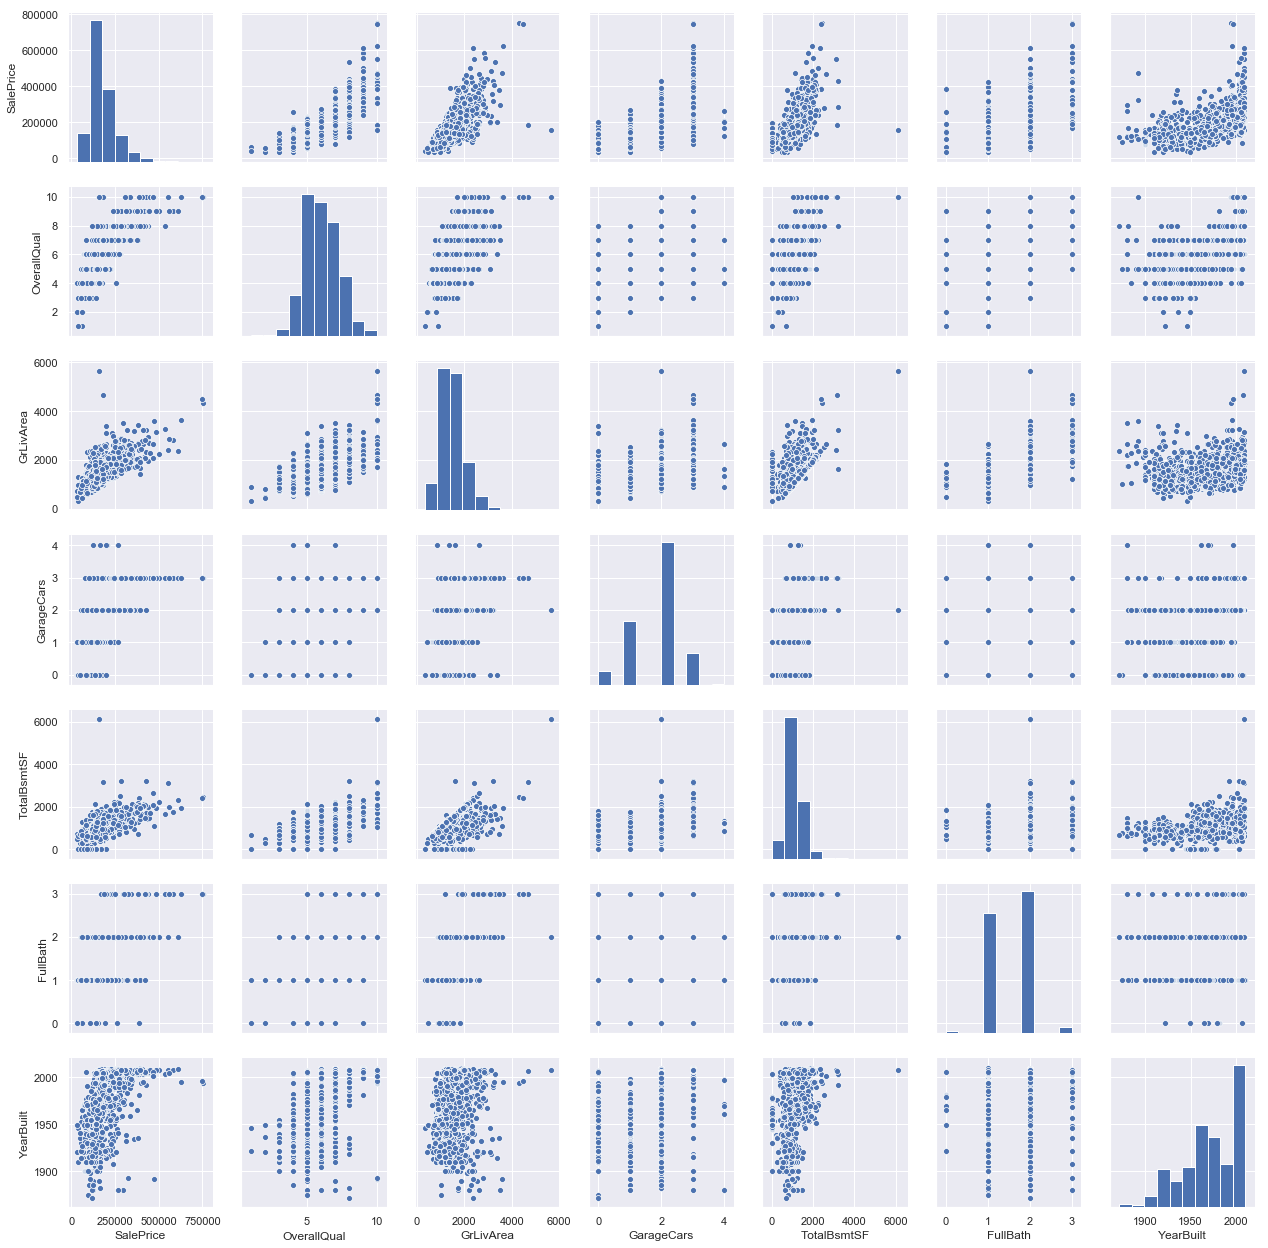

In [23]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Nous pouvons pouvons remarquer la tres grande dependance entre 'TotalBsmtSF' et 'GrLiveArea'. 

In [24]:
#df_train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

# Nettoyage des données

Les questions à se poser concernant les données manquantes:

- Quelle est la prévalence des données manquantes?
- Les données manquantes sont-elles aléatoires ou y a-t-il une tendance?

In [25]:
#missing data
# sum calcule le nombre de valeurs nulles dans chaque caracteristique
total = df_train.isnull().sum().sort_values(ascending=False)
# count calcule le nombre de valeurs que nous avons pour chaque caracteristiques
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [26]:
missing_data[missing_data['Total'] > 1]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


**Remarques soutirées de ce [notebook](https://www.kaggleusercontent.com/kf/7211745/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..qIzrgauZ6CSjasL4C1sLdA.hJ_N2k2OlhTHn70Z3USGvyr4So4WQHsdcQG9OE907fW3d5NQ5CyJGPpIzZ2MJJsfi-AcEgDZhT3Ndeu4JZMz4LtA8fjj7cu8p4U-GgXgxEKLlze42-OqDzK9cEO3x4wtkHpJ18Z09Eth7qIOfqKqMMYV-MYHK9iWsPb_v6ePB-yvXkBTAS5o5_agVgqXMp0O.3q4SzjA2Ea0QznvO-cUp3g/__results__.html#4.-Missing-data):**

Nous considérerons que lorsque plus de 15% des données sont manquantes, nous devrions supprimer la variable correspondante. Cela signifie qu'il y a un ensemble de variables (par exemple, 'PoolQC', 'MiscFeature', 'Alley', etc.) que nous devrions supprimer. Le point est: allons-nous manquer ces données? Je ne pense pas. Aucune de ces variables ne semble être très importante, car la plupart d’entre elles ne sont pas des aspects auxquels nous pensons lors de l’achat d’une maison (c’est peut-être la raison pour laquelle les données manquent?). De plus, en regardant de plus près les variables, nous pourrions dire que des variables telles que «PoolQC», «MiscFeature» et «FireplaceQu» sont des candidats solides pour les valeurs aberrantes. Nous serons donc ravis de les supprimer.

En ce qui concerne les cas restants, nous pouvons voir que les variables 'GarageX' ont le même nombre de données manquantes. Je parie que les données manquantes se réfèrent au même ensemble d'observations. Puisque les informations les plus importantes concernant les garages sont exprimées par «GarageCars» et considérant que nous ne parlons que de 5% des données manquantes, je supprimerai les variables «GarageX» mentionnées. La même logique s'applique aux variables 'BsmtX'.

En ce qui concerne 'MasVnrArea' et 'MasVnrType', nous pouvons considérer que ces variables ne sont pas essentielles. De plus, ells ont une forte corrélation avec 'YearBuilt' et 'OverallQual' qui sont déjà pris en compte. Ainsi, nous ne perdrons pas d'informations si nous supprimons 'MasVnrArea' et 'MasVnrType'.

Enfin, il nous manque une observation dans «Electrical». Comme il ne s'agit que d'une observation, nous allons supprimer cette observation et conserver la variable.

En résumé, pour gérer les données manquantes, nous allons supprimer toutes les variables avec les données manquantes, à l'exception de la variable 'Electrique'. Dans "Électrique", nous allons simplement supprimer l'observation avec les données manquantes.

In [27]:
# On s'occupe des donnees manquantes suivant la logique expliquee ci-dessus
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
# On verifie
df_train.isnull().sum().max()

0

# Analyse des valeurs aberrantes (outliers)

## Analyse univariée

- Ce qu'on cherche à faire ici c'est de trouver un seuil avec lequel nous pourrions déterminer si une valeur est une valeur aberrante ou non pour cela nous allons normaliser nos données en suivant le principe de la loi normale. En d'autres mots, nous allons avoir une moyenne de 0 et une déviation de 1.

In [28]:
#standardizing data
# On peut utiliser df_train['SalePrice'].reshape(-1,1) pour changer la dimension de nos donnees a 2D car la notre n'est que 1D array
# Ou df_train['SalePrice'][:,np.newaxis] le np.newaxis va nous creer un axe mais ne contiendra aucune donnee (None)
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

In [29]:
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [30]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


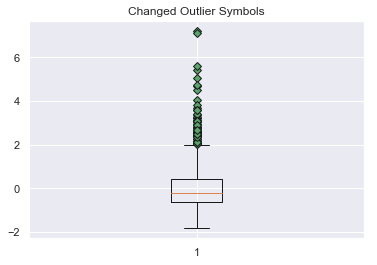

In [31]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')
ax3.boxplot(saleprice_scaled, flierprops=green_diamond);

- D'après l'analyse des valeurs et le box plot on peut voir que les outliers commencent à apparaitre depuis la valeur 2 mais ceux les plus inquiétants sont ceux dont la valeur dépasse 6 (de 7 et en haut).

# Analyse multivariables 

- Penchons nous maintenant sur une analyse plus approfondie des scatterplots: 

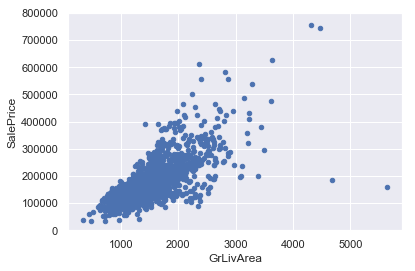

In [32]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- On remarque deux valeurs a l'extrême droite qui ne suivent pas le comportement normal de nos données ceux qui commencent à partir de 4000 et quelques, pour la variable GrLiveArea. Nous allons nous en débarrasser.
- En ce qu'il s'agit des valeurs en haut (à l'extrémité) on dirait que ces nos valeurs qui montrent un comportement etrange de 7 et quelque chose (expliquer en dessus) on va les garder, car elles suivent le meme comportement que celui de nos donnees.

In [33]:
#On distingue ces points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [34]:
# On les supprime
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

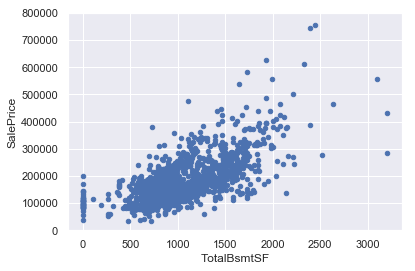

In [35]:
#bivariate analysis saleprice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- Ici, je pense qu'il vaut mieux tout garder. (Rien de catastrophique à signaler)

- Pour cette section veuillez lire [ceci](https://www.kaggleusercontent.com/kf/7211745/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..qIzrgauZ6CSjasL4C1sLdA.hJ_N2k2OlhTHn70Z3USGvyr4So4WQHsdcQG9OE907fW3d5NQ5CyJGPpIzZ2MJJsfi-AcEgDZhT3Ndeu4JZMz4LtA8fjj7cu8p4U-GgXgxEKLlze42-OqDzK9cEO3x4wtkHpJ18Z09Eth7qIOfqKqMMYV-MYHK9iWsPb_v6ePB-yvXkBTAS5o5_agVgqXMp0O.3q4SzjA2Ea0QznvO-cUp3g/__results__.html#5.-Getting-hard-core) 
avant de continuer. 

## Normality

- Histogram - Kurtosis and skewness.
- Normal probability plot - La distribution des données doit suivre de près la diagonale qui représente la distribution normale.

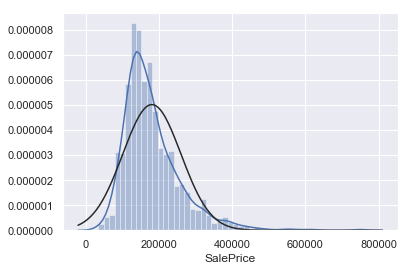

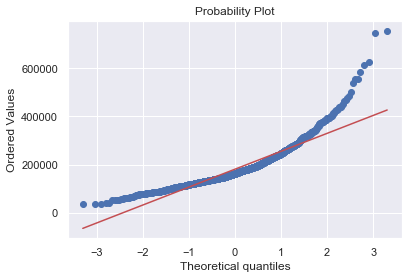

In [36]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

'SalePrice' n'est pas normal. Elle présente une «pique», une asymétrie positive et ne suit pas la diagonale.

=> Une simple transformation logarithmique de données peut résoudre le problème. 

In [37]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

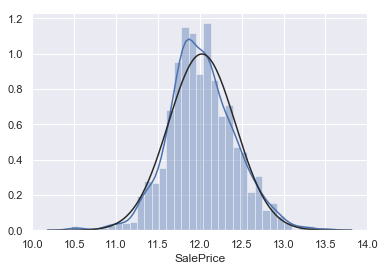

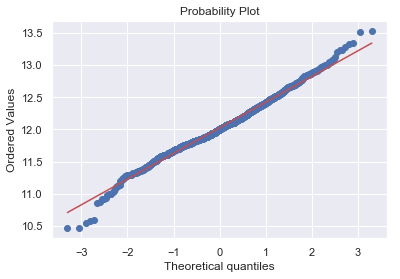

In [38]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Et voilà ! On passe à 'GrLiveArea'.

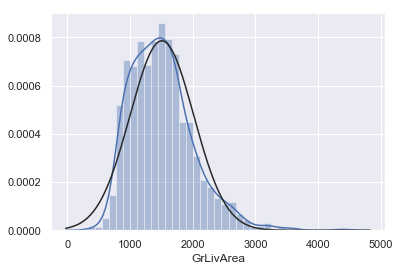

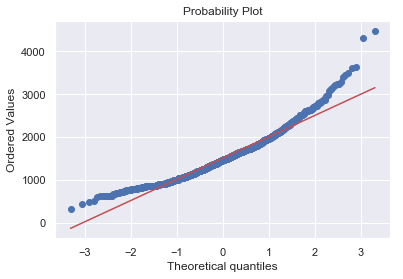

In [39]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

- C'est pas pire que l'autre mais comme meme.

In [40]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

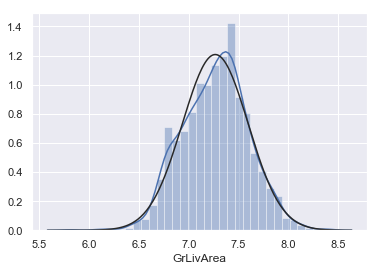

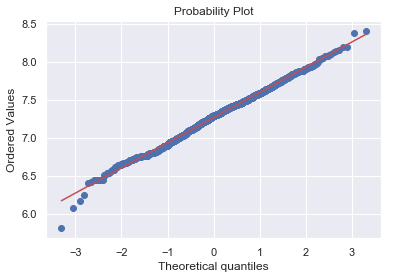

In [41]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Au suivant : 'TotalBsmtSF'

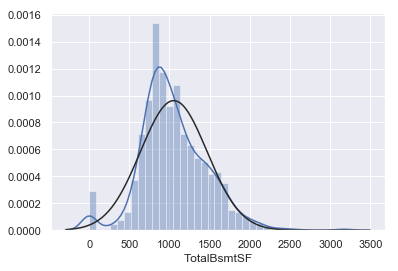

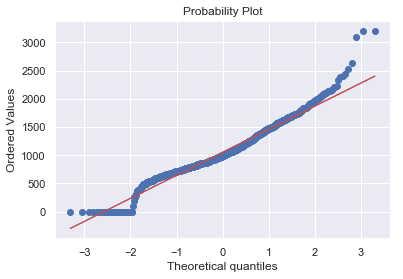

In [42]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

- Bonjour les problèmes : on peut pas exécuter de log puisque ce n'est pas défini dans 0 (maisons sans sous-sol).
- On définit des variables booléennes pour nous aider à filtrer les maisons qui ont un sous-sol et ceux qui ne l'ont pas.

In [43]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [44]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

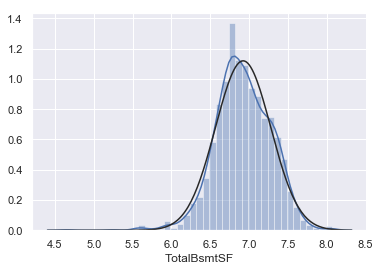

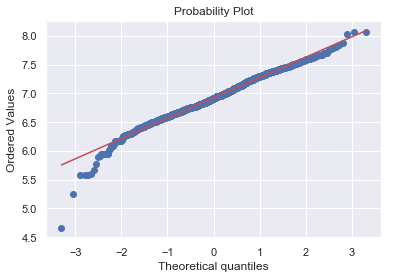

In [45]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Homoscédasticité

- Pour mieux comprendre visitez ce lien : https://www.youtube.com/watch?v=4p8jIam7fBA
- Voici une image pour vous décrire ce qu'on cherche:
<br>
<img src='homoscedasticite.PNG'>

- L'illustration à gauche est ce qu'on cherche à avoir et c'est ce qu'on appelle l'homoscédasticité.

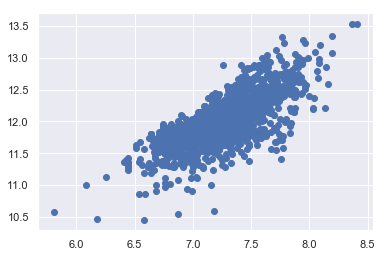

In [46]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

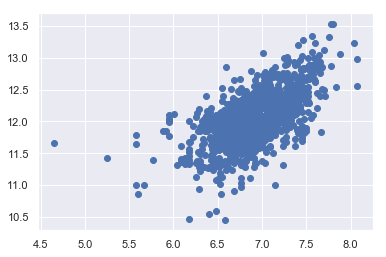

In [47]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

- Grace à la normalisation nous avons néanmoins une variance de données plus ou moins équitable.

<p style="font-size:200%;color:#00334d"> <b>II) Prédiction </b> </p>

# Préparation de données pour l'apprentissage

1. Nous allons convertir nos données qualitatives en un encodage numérique (pour pouvoir utiliser scikit-learn)

In [48]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [49]:
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


2. On selectionne les caractéristiques sur lesquels on va entrainer notre modèle 

- En se basant sur les analyses faites précédemment je garde : 'SalePrice','OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt'.

In [50]:
df_train[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,YearBuilt
0,7,7.444249,6.752270,2,2003
1,6,7.140453,7.140453,2,1976
2,7,7.487734,6.824374,2,2001
3,7,7.448334,6.628041,1,1915
4,8,7.695303,7.043160,2,2000


In [51]:
features = df_train[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].columns

3. On determine notre X et y

In [52]:
X = df_train[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

In [53]:
y = df_train['SalePrice']

In [54]:
X.head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,YearBuilt
0,7,7.444249,6.752270,2,2003
1,6,7.140453,7.140453,2,1976
2,7,7.487734,6.824374,2,2001
3,7,7.448334,6.628041,1,1915
4,8,7.695303,7.043160,2,2000


In [55]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

4. On divise nos données en test et entrainements (train)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Implémentation des algorithmes

**Rq** : Ces fonctions je les ai prisent d'[ici](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)

In [57]:
# Plot learning curves
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_log_error

In [58]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [59]:
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

## Linear Regression

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression().fit(X_train, y_train)

In [92]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=10)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.80239826 0.80482414 0.82157174 0.82692411 0.8219781  0.78886012
 0.83513727 0.79187755 0.784181   0.82598506]
Average 10-Fold CV Score: 0.8103737337939629


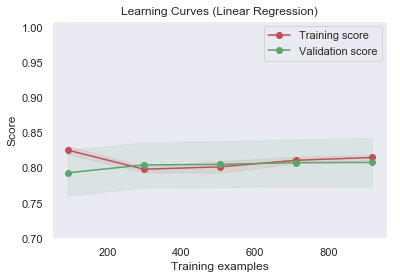

In [83]:
title = "Learning Curves (Linear Regression)"
cv = 10
plot_learning_curve(reg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

- Notre modele souffre de ce qu'on appelle underfitting voyons d'autres modeles.

In [94]:
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [95]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
rmsleReg = np.sqrt( mean_squared_log_error(y_test, y_pred))
print("Root Mean Squared Log Error: {}".format(rmsleReg))

R^2: 0.8140373315680624
Root Mean Squared Log Error: 0.013750020974520777


## Lasso

In [96]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.0001)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lasso, X, y, cv=10)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.80233543 0.80473082 0.82166157 0.82691824 0.82192859 0.78888802
 0.83505862 0.79217017 0.7841993  0.8258662 ]
Average 5-Fold CV Score: 0.810375695701867


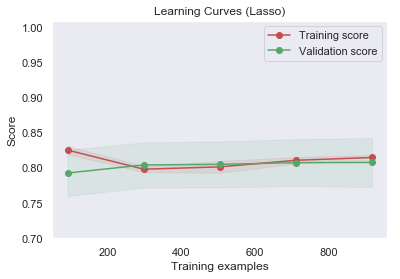

In [97]:
title = "Learning Curves (Lasso)"
cv = 10
plot_learning_curve(lasso, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

- Meme resultat que Linear regression

In [98]:
lasso = lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [99]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmsleLasso = np.sqrt( mean_squared_log_error(y_test, y_pred))
print("Root Mean Squared Log Error: {}".format(rmsleLasso))

R^2: 0.8142055930767129
Root Mean Squared Log Error: 0.013743388355277136


## Ridge

In [131]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge()

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
print("Average 10-Fold CV Score: {}".format(np.mean(ridge_cv_scores)))

Average 10-Fold CV Score: 0.8103706181060281


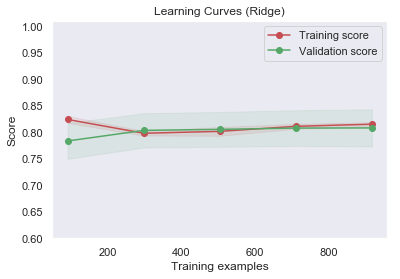

In [133]:
title = "Learning Curves (Ridge)"
cv = 10
plot_learning_curve(ridge, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, n_jobs=1);

## KNN Regression

In [100]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model and set the number of neighbors to consider to 3
knnreg = KNeighborsRegressor(n_neighbors=3)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(knnreg, X, y, cv=10)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.70953065 0.65726887 0.72323706 0.70290843 0.71438361 0.69060533
 0.72628453 0.74001385 0.69927    0.68966418]
Average 5-Fold CV Score: 0.7053166498118845


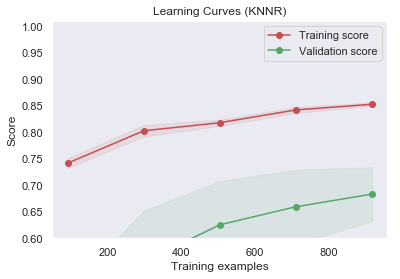

In [101]:
title = "Learning Curves (KNNR)"
cv = 10
plot_learning_curve(knnreg, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, n_jobs=1);

In [134]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(knnreg.score(X_test, y_test)))
rmsleRidge = np.sqrt( mean_squared_log_error(y_test, y_pred))
print("Root Mean Squared Log Error: {}".format(rmsleRidge))

R^2: 0.6949372184788019
Root Mean Squared Log Error: 0.01763417205175379


### GridSearch

In [102]:
# Import necessary modules
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
n_space = [3, 6, 9]
param_grid = {'n_neighbors': n_space}

# Instantiate a logistic regression classifier: logreg
knnreg = KNeighborsRegressor()

# Instantiate the GridSearchCV object: logreg_cv
gm_cv = GridSearchCV(knnreg, param_grid, cv=10)

# Fit it to the data
gm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned KNN Regression Parameters: {}".format(gm_cv.best_params_)) 
print("Best score is {}".format(gm_cv.best_score_))

Tuned KNN Regression Parameters: {'n_neighbors': 3}
Best score is 0.6832352883629138


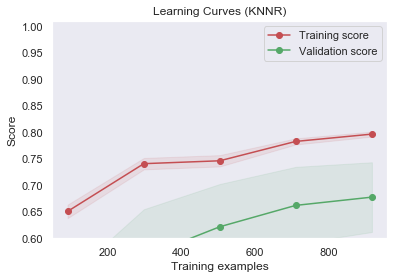

In [103]:
title = "Learning Curves (KNNR)"
cv = 10
plot_learning_curve(knnreg, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, n_jobs=1);

In [104]:
knnreg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
y_pred = knnreg.predict(X_test)

In [105]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(knnreg.score(X_test, y_test)))
rmsleKnn = np.sqrt( mean_squared_log_error(y_test, y_pred))
print("Root Mean Squared Log Error: {}".format(rmsleKnn))

R^2: 0.6949372184788019
Root Mean Squared Log Error: 0.01763417205175379


## Decision Trees pour la régression

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(regressor, X, y, cv=10)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.59703354 0.69882995 0.72137724 0.65671485 0.72072556 0.69409329
 0.7061881  0.70772205 0.74870034 0.69165255]
Average 5-Fold CV Score: 0.6943037461040645


### Randomized Search

In [107]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 5),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["mse", "friedman_mse", "mae"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=10)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'mse', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 8}
Best score is 0.7839837833063277


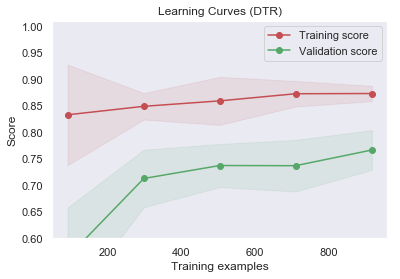

In [108]:
title = "Learning Curves (DTR)"
cv = 10
plot_learning_curve(tree_cv, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, n_jobs=1);

In [110]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(tree_cv.score(X_test, y_test)))
rmsletree = np.sqrt( mean_squared_log_error(y_test, y_pred))
print("Root Mean Squared Log Error: {}".format(rmsletree))

R^2: 0.8780492856266188
Root Mean Squared Log Error: 0.01763417205175379


## SVR

In [111]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [112]:
svr_rbf = svr_rbf.fit(X_train, y_train)
rmsleRbf = np.sqrt( mean_squared_log_error(y_test, y_pred))
print("Root Mean Squared Log Error: {}".format(rmsleRbf))

Root Mean Squared Log Error: 0.01763417205175379


In [124]:
svr_lin = svr_lin.fit(X_train, y_train)
rmsleLin = np.sqrt( mean_squared_log_error(y_test, y_pred))
print("Root Mean Squared Log Error: {}".format(rmsleLin))

Root Mean Squared Log Error: 0.01763417205175379


In [ ]:
svr_poly = svr_poly.fit(X_train, y_train)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("Root Mean Squared Log Error: {}".format(rmsle))

## Comparaison des resultats 

In [135]:
import pandas as pd

model = pd.DataFrame({'Model': ['LinearRegression', 'Lasso', 'Ridge', 'KNNRegressor', 'Decision Tree Regressor', 'SVR_RBF', 'SVR_LIN']})
bestRmsle = pd.DataFrame({'Best RMSLE': [rmsleReg, rmsleLasso, rmsleRidge,rmsleKnn, rmsletree, rmsleRbf, rmsleLin]})

In [136]:
import pandas as pd

dfs = [model, bestRmsle]
alldf = pd.concat(dfs, axis=1)

In [139]:
alldf.set_index('Model')

,Best RMSLE
Model,
LinearRegression,0.013750
Lasso,0.013743
Ridge,0.017634
KNNRegressor,0.017634
Decision Tree Regressor,0.017634
SVR_RBF,0.017634
SVR_LIN,0.017634
